In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import re
import requests
import json
from Bio.Align.Applications import ClustalOmegaCommandline

In [2]:
file_path = "data/genome/deinococcus/radiodurans/GCF_000008565.1_ASM856v1/deinococcus_radiodurans_genomic.gbff"
records1 = SeqIO.index(file_path, 'gb')
records1

SeqIO.index('data/genome/deinococcus/radiodurans/GCF_000008565.1_ASM856v1/deinococcus_radiodurans_genomic.gbff', 'gb', alphabet=None, key_function=None)

In [3]:
file_path = "data/genome/deinococcus/gobiensis/GCA_000252445.1_ASM25244v1/deinococcus_gobiensis_genomic.gbff"
records2 = SeqIO.index(file_path, 'gb')
records2

SeqIO.index('data/genome/deinococcus/gobiensis/GCA_000252445.1_ASM25244v1/deinococcus_gobiensis_genomic.gbff', 'gb', alphabet=None, key_function=None)

In [4]:
list(records1.keys())

['NC_001263.1', 'NC_001264.1', 'NC_000959.1', 'NC_000958.1']

In [5]:
list(records2.keys())

['NC_017790.1',
 'NC_017805.1',
 'NC_017791.1',
 'NC_017771.1',
 'NC_017792.1',
 'NC_017806.1',
 'NC_017793.1']

In [6]:
url = "http://omabrowser.org/api"

In [12]:
genome_id_1 = 243230
species1 = "Deinococcus_Radiodurans_R1" #ClustalO / PAL2NALで空白より前のみが切り取られるので、_で繋ぐと良い
genome_id_2 = 745776
species2 = "Deinococcus_gobiensis_I0"
url_pairs = url + "/pairs" + "/{}/{}/?rel_type=1%3A1".format(genome_id_1, genome_id_2)
print(url_pairs)
response = requests.get(url_pairs)
print(response.status_code)

http://omabrowser.org/api/pairs/243230/745776/?rel_type=1%3A1
200


In [8]:
dic = json.loads(response.content.decode())
dic

[{'entry_1': {'entry_nr': 1873968,
   'entry_url': 'https://omabrowser.org/api/protein/1873968/',
   'omaid': 'DEIRA00002',
   'canonicalid': 'DNAA_DEIRA',
   'sequence_md5': '0e57c032d2f3322f00fbabca8911e570',
   'oma_group': 881222,
   'oma_hog_id': 'HOG:0676594',
   'chromosome': 'Chromosome I',
   'locus': {'start': 1904, 'end': 3304, 'strand': -1},
   'is_main_isoform': True},
  'entry_2': {'entry_nr': 1859564,
   'entry_url': 'https://omabrowser.org/api/protein/1859564/',
   'omaid': 'DEIGI00001',
   'canonicalid': 'H8GS33',
   'sequence_md5': 'ba0672ce0d70ba4c72f3779e0c0cb745',
   'oma_group': 881222,
   'oma_hog_id': 'HOG:0676594',
   'chromosome': 'A',
   'locus': {'start': 1, 'end': 1362, 'strand': 1},
   'is_main_isoform': True},
  'rel_type': '1:1',
  'distance': 15.668899536132812,
  'score': 4013.43994140625},
 {'entry_1': {'entry_nr': 1873967,
   'entry_url': 'https://omabrowser.org/api/protein/1873967/',
   'omaid': 'DEIRA00001',
   'canonicalid': 'Q9RYE8',
   'sequence

In [ ]:
#オーソログにpprAタンパク質が含まれているか確認->含まれていない
for entry in dic:
    if entry['entry_1']['canonicalid'] == "PPRA_DEIRA":
        print(entry)

In [9]:
ortho_location_dict = [
    [entry['entry_1']['locus']['start'], entry['entry_1']['locus']['end'], entry['entry_1']['locus']['strand'], entry['entry_1']['chromosome'], entry['entry_2']['locus']['start'], entry['entry_2']['locus']['end'], entry['entry_2']['locus']['strand'], entry['entry_2']['chromosome']]
    for entry in dic
    if entry['entry_1']['chromosome'] == 'Chromosome I'
]
ortho_location_dict

[[1904, 3304, -1, 'Chromosome I', 1, 1362, 1, 'A'],
 [1, 1182, -1, 'Chromosome I', 1782, 2864, 1, 'A'],
 [2647256, 2648524, -1, 'Chromosome I', 3485, 4756, 1, 'A'],
 [2645698, 2647146, -1, 'Chromosome I', 4823, 6271, 1, 'A'],
 [2459101, 2460039, 1, 'Chromosome I', 6773, 7711, 1, 'A'],
 [2601909, 2602919, -1, 'Chromosome I', 7754, 8713, 1, 'A'],
 [2634670, 2635239, 1, 'Chromosome I', 8733, 9155, -1, 'A'],
 [2362890, 2363804, 1, 'Chromosome I', 10074, 10898, -1, 'A'],
 [2362411, 2362893, 1, 'Chromosome I', 11000, 11515, -1, 'A'],
 [2359426, 2361264, -1, 'Chromosome I', 17394, 19229, -1, 'A'],
 [2361604, 2362299, 1, 'Chromosome I', 19556, 20251, 1, 'A'],
 [122858, 123373, -1, 'Chromosome I', 20379, 20837, 1, 'A'],
 [17147, 17557, -1, 'Chromosome I', 20862, 21137, -1, 'A'],
 [17568, 18185, -1, 'Chromosome I', 21261, 21890, -1, 'A'],
 [18182, 19063, -1, 'Chromosome I', 21887, 22795, -1, 'A'],
 [19258, 20643, 1, 'Chromosome I', 23048, 24349, 1, 'A'],
 [20768, 21034, 1, 'Chromosome I', 24490,

In [10]:
ortho_location_df = pd.DataFrame(ortho_location_dict, columns=['start1', 'end1', 'strand1', 'chromosome1', 'start2', 'end2', 'strand2', 'chromosome2'])
ortho_location_df

start1     end1  strand1   chromosome1  start2    end2  strand2  \
0      1904     3304       -1  Chromosome I       1    1362        1   
1         1     1182       -1  Chromosome I    1782    2864        1   
2   2647256  2648524       -1  Chromosome I    3485    4756        1   
3   2645698  2647146       -1  Chromosome I    4823    6271        1   
4   2459101  2460039        1  Chromosome I    6773    7711        1   
5   2601909  2602919       -1  Chromosome I    7754    8713        1   
6   2634670  2635239        1  Chromosome I    8733    9155       -1   
7   2362890  2363804        1  Chromosome I   10074   10898       -1   
8   2362411  2362893        1  Chromosome I   11000   11515       -1   
9   2359426  2361264       -1  Chromosome I   17394   19229       -1   
10  2361604  2362299        1  Chromosome I   19556   20251        1   
11   122858   123373       -1  Chromosome I   20379   20837        1   
12    17147    17557       -1  Chromosome I   20862   21137       -1   
13    17568    18185       -1  Chromosome I   21261   21890       -1   
14    18182    19063       -1  Chromosome I   21887   22795       -1   
15    19258    20643        1  Chromosome I   23048   24349        1   
16    20768    21034        1  Chromosome I   24490   24768        1   
17  1941108  1941479       -1  Chromosome I   24800   25153        1   
18  2358954  2359301       -1  Chromosome I   25197   25577        1   
19  2357858  2358931       -1  Chromosome I   25701   26717        1   
20  2332286  2333446        1  Chromosome I   26702   27874        1   
21  2333447  2334127       -1  Chromosome I   27935   28582       -1   
22  2536880  2537773        1  Chromosome I   33310   34203        1   
23   119580   120929       -1  Chromosome I   34394   35554       -1   
24   120921   121730        1  Chromosome I   35750   36574        1   
25   121944   122570       -1  Chromosome I   36694   37335       -1   
26   122563   122847       -1  Chromosome I   37350   37589       -1   
27  2540977  2541675        1  Chromosome I   37596   38279       -1   
28  2438904  2439683       -1  Chromosome I   43343   44014        1   
29  2437560  2438003        1  Chromosome I   44473   45087       -1   
..      ...      ...      ...           ...     ...     ...      ...   
64  2533937  2534788        1  Chromosome I   92338   93195       -1   
65  2531406  2532917       -1  Chromosome I   93443   95839        1   
66  2608503  2609246        1  Chromosome I   95883   96542       -1   
67  2424288  2424734        1  Chromosome I  101123  101566        1   
68   237452   238306       -1  Chromosome I  102106  102954       -1   
69   243002   243403       -1  Chromosome I  102957  103346       -1   
70   243688   244404        1  Chromosome I  103509  104231        1   
71   244413   245486       -1  Chromosome I  104195  105019       -1   
72   245486   247498        1  Chromosome I  105503  107227        1   
73   248513   249634        1  Chromosome I  108241  109353        1   
74  2583500  2584684       -1  Chromosome I  112912  114069        1   
75  2036189  2036638        1  Chromosome I  114153  114587        1   
76   396838   398931        1  Chromosome I  114565  116631       -1   
77   285770   286477        1  Chromosome I  119832  120512        1   
78   287245   290115        1  Chromosome I  121292  124135        1   
79    83069    84322       -1  Chromosome I  124262  125539        1   
80   100030   100338        1  Chromosome I  132034  132342        1   
81   100458   101361        1  Chromosome I  132457  133359        1   
82   101418   101696        1  Chromosome I  133442  133717        1   
83   101709   102149        1  Chromosome I  133729  134169        1   
84   104505   105206        1  Chromosome I  134993  135550        1   
85  2320068  2320508        1  Chromosome I  135529  135918       -1   
86  2396244  2398052        1  Chromosome I  136143  137918        1   
87  2430251  2431288       -1  Chromosome I  

In [11]:
#見つかったホモログはgenome1のChromosome IとChoromosomeⅡからであることを確認
# genome2は、ChromosomeとPlasmid pTT27の両方に存在していることを確認
for entry in dic:
    if entry['entry_1']['chromosome'] != 'Chromosome I':
        print("geonome1")
        print(entry['entry_1']['chromosome'])
    if entry['entry_2']['chromosome'] != 'A':
        print("geonome2")
        print(entry['entry_2']['chromosome'])

geonome1
Chromosome II
geonome1
Chromosome II
geonome1
Chromosome II
geonome1
Chromosome II
geonome1
Chromosome II
geonome1
Chromosome II


In [13]:
# DeinococcusのCDSのstart, endの整理
genome1_location_dict = {
    record_id: [
        [ feature.location.start, feature.location.end, feature.location.strand, feature.qualifiers['translation'][0]]
        for feature in record.features 
        if feature.type == "CDS"
    ]
    for record_id, record in records1.items()
}

genome1_location_dict

{'NC_001263.1': [[ExactPosition(0),
   ExactPosition(1182),
   -1,
   'MMKANVTKKTLNEGLGLLERVIPSRSSNPLLTALKVETSEGGLTLSGTNLEIDLSCFVPAEVQQPENFVVPAHLFAQIVRNLGGELVELELSGQELSVRSGGSDFKLQTGDIEAYPPLSFPAQADVSLDGGELSRAFSSVRYAASNEAFQAVFRGIKLEHHGESARVVASDGYRVAIRDFPASGDGKNLIIPARSVDELIRVLKDGEARFTYGDGMLTVTTDRVKMNLKLLDGDFPDYERVIPKDIKLQVTLPATALKEAVNRVAVLADKNANNRVEFLVSEGTLRLAAEGDYGRAQDTLSVTQGGTEQAMSLAFNARHVLDALGPIDGDAELLFSGSTSPAIFRARRWGRRVYGGHGHAARLRGLLRPLRGMSALAHHPESSPPLEPRPEFA'],
  [ExactPosition(1903),
   ExactPosition(3268),
   -1,
   'MRKNVSDLEYTTWFAPVKPLGVQEGSLLLGVRNSFTKDWFRDHYLELLLAALRSLGAEHPQVEFQVLPAAQDALLLPNDPPPAPEAAAPTPKTKAAPTPPPSTPGDNRKTLNPKYTFENFVVGPNNNLAHAAALAVAESPGKAYNPLFIYGDVGLGKTHLMHAVGHYLAERFPEKRIEYVSTETFTNELINAIRDDKTTQFRNRYRSVDLLLVDDIQFLAGKERTQEEFFHTFNALYESNKQIILSSDRPPKDIQTLEGRLRSRFEWGLITDIQSPEYETRVAILKMNAEQGHITIPQEVLELIARQVTSNIRELEGALMRVVAFASLNNVPFSRAAAAKALSNVFAPQEAKVEMTDVLRQVAAHYGTTPDLIRGSGRARDIVVPRQVAQYLIRALTDHSLPEIGQFFGRDHSTVMHAVSKITEQMGKDPELAATVNTLRNRIQGKEEEEEVGA'],
  [ExactPositio

In [14]:
genome1_location_df = pd.DataFrame(genome1_location_dict[list(records1.keys())[0]], columns=['start', 'end', 'strand', 'translation'])
genome1_location_df

start      end  strand  \
0           0     1182      -1   
1        1903     3268      -1   
2        3411     4287       1   
3        4377     5430       1   
4        5437     6115       1   
5        6161     6944      -1   
6        6985     7822       1   
7        7818     8859       1   
8        8924    10283       1   
9       10412    11615       1   
10      11854    12736      -1   
11      13332    14199      -1   
12      14182    15073      -1   
13      15100    15862      -1   
14      15858    16215      -1   
15      16306    17047      -1   
16      17146    17557      -1   
17      17567    18185      -1   
18      18181    19063      -1   
19      19257    20643       1   
20      20767    21034       1   
21      21161    21761      -1   
22      22232    22766       1   
23      22762    23875       1   
24      23982    25182       1   
25      25272    26082       1   
26      26165    27968      -1   
27      28039    29674       1   
28      29795    30941       1   
29      30937    31972       1   
...       ...      ...     ...   
2599  2615982  2616672      -1   
2600  2616671  2617097      -1   
2601  2617145  2618405       1   
2602  2618482  2619244      -1   
2603  2619534  2622093      -1   
2604  2622115  2622733      -1   
2605  2622782  2623499       1   
2606  2623520  2624273      -1   
2607  2624354  2625236      -1   
2608  2625269  2625779      -1   
2609  2625849  2626893       1   
2610  2626889  2627831       1   
2611  2628006  2629011       1   
2612  2629330  2631793       1   
2613  2631873  2632860      -1   
2614  2632856  2633618      -1   
2615  2633661  2634660      -1   
2616  2634669  2635239       1   
2617  2635310  2636537      -1   
2618  2636628  2638251       1   
2619  2638681  2640076      -1   
2620  2640083  2640752      -1   
2621  2640753  2641065      -1   
2622  2641470  2642265       1   
2623  2642261  2642699       1   
2624  2642722  2643265       1   
2625  2643234  2644083       1   
2626  2644263  2645499       1   
2627  2645697  2647146      -1   
2628  2647255  2648524      -1   

                                            translation  
0     MMKANVTKKTLNEGLGLLERVIPSRSSNPLLTALKVETSEGGLTLS...  
1     MRKNVSDLEYTTWFAPVKPLGVQEGSLLLGVRNSFTKDWFRDHYLE...  
2     MGTGDPSPLASQGPLPLVEGQKMKKPPPVRRGMNEAMEDRGSFFMA...  
3     MVVMSYLSELRAVWGHRALPAAGVSVLLQDETGRVLLQRRGDDGQW...  
4     MSAVIHLQALGLTEYEARAYTALLALGRAVPARVARQAGIPRPKIY...  
5     MKRLRSGGGDKRAQHPHAVAPPHSYSGVPGGNLMLKIRSLGHSTFF...  
6     MPVGDRRSLLPLTTLSSLNLLGITLRDLLDILLVAALLYQGYKLVV...  
7     MSGGEAQGKRKQWQRWLSPRYVWRRLRHNIGPKLVSLGAALVLWSV...  
8     MTKFVSAPLICGLALLGALSAAHAQTGIPALPPIAQPLPVPAPAPV...  
9     MKSPLPMGLMAILQYVLSAVPLRKTQRNFLTVLLSVFLAVPGRLNA...  
10    MNSTSSPTIAVTAATGKLGQLVVSSLLERGVPADHIVAIVRNPAKA...  
11    MSKKSSLGRGLDALLTKKGEPVAQAGTGTQVQTLKIERIAQAAYQP...  
12    MTDHAGGDPAARHSENCSRLWTCAPLRGSNRQAPRRCAGGARSDRR...  
13    MIPDALTPAGRELLRRGADDLGLDVAPHEEQFARLLALLRAGNERL...  
14    MGRARRGAHMTELNDFQRGLLLGILIGEGHFGGDGKQPHVTLRMHT...  
15    MDLSQARAALKAARRVAVLTGAGISAESGIPTFRDAQTGHWARFRP...  
16    MTGPGRFALQKLPTLYHPPMRPLPLPFPDETEAPLVTELRFPTSGT...  
17    MREDRMREKVVRLLGLVQAGRLTLDDAAPLLAALSPKLALEGSDRE...  
18    MNEEQHEQFRSQVEHLVATGKLTAEEAAELLDGLAGDEPGEPLNLA...  
19    MTQPELTPAQRTEVELLARGRADKSRVLRDLKLPETPEAAHALLLR...  
20    MTAASLPCDIVSLRMAHCRAEHAAGSRQYHLAVLHYRTCLEVAERR...  
21    MPHHVPLQAHLQDLRARVAPRGLDIPELDPAGGGVNSRILCLLEAP...  
22    MSDLSADSASPRVGVVMGSRSDSETMQGALDLLSQLEIPYEVRVLS...  
23    MSDQPAATLGILGGGQLAQMLALAALPLGVQVRVLEPDAEAPARLC...  
24    MKRFLLPLLLTWPGAALAAQPAPQLALAQDLQLTFKGELKKIDDGQ...  
25    MTTDQQRRAANARQFDRIAADYDALGFLTQAALALAAALDVPPTGR...  
26    MKGWNVIVIGGGHAGLEAAWAAAKFSRVALLVGNPATVGRMPCNPA...  
27    MDLATLRAHNSGMDFASLRADLIGSEAVIRTPFGERRVTYADYVAS...  
28    MPPAVRVPGGLKFMIQPFTADPIRFVAEDGRPVLALPERYTPALLR...  
29    MTATQEKQAQGKQAGTEQPAVRTLNLIQAITEALADELERDPNVVL...  
...                                                 ...  
2599  MQVRAVFFARLRREVGLEELTLDVPDGADVRAVAEHL

In [16]:
# Deinococcus gobiensisのCDSのstart, endの整理

    genome2_location_dict = {
    record_id: [
        [ feature.location.start, feature.location.end, feature.location.strand, feature.qualifiers['translation'][0]]
        for feature in record.features 
        if feature.type == "CDS"
    ]
    for record_id, record in records2.items()
}
    
genome2_location_dict

KeyError: 'translation'

In [20]:
genome2_location_dict = {}
for record_id, record in records2.items():
    location_list = []
    for feature in record.features:
        if feature.type == "CDS":
            try:
                location_list.append([ feature.location.start, feature.location.end, feature.location.strand, feature.qualifiers['translation'][0]])
            except:
                continue
    genome2_location_dict[record_id] = location_list

In [21]:
genome2_location_df = pd.DataFrame(genome2_location_dict[list(records2.keys())[0]], columns=['start', 'end', 'strand', 'translation'])
genome2_location_df

start      end  strand  \
0           0     1362       1   
1        3484     4756       1   
2        4822     6271       1   
3        6772     7711       1   
4        7753     8713       1   
5        8732     9263      -1   
6        9309    10032      -1   
7       10073    10982      -1   
8       10999    11515      -1   
9       11561    13025       1   
10      13141    14065      -1   
11      14115    14304      -1   
12      14300    15056      -1   
13      15120    16173      -1   
14      16213    17227      -1   
15      17393    19229      -1   
16      19555    20251       1   
17      20324    20837       1   
18      20861    21218      -1   
19      21260    21890      -1   
20      21886    22795      -1   
21      22966    24349       1   
22      24489    24768       1   
23      24799    25153       1   
24      25196    25577       1   
25      25700    26717       1   
26      26701    27874       1   
27      27934    28582      -1   
28      28701    29850       1   
29      29882    30644       1   
...       ...      ...     ...   
2859  3106283  3108980      -1   
2860  3108999  3110307      -1   
2861  3110554  3111547       1   
2862  3111603  3112605       1   
2863  3112957  3113260       1   
2864  3113277  3113553       1   
2865  3113637  3114960       1   
2866  3115000  3116158      -1   
2867  3116446  3116974      -1   
2868  3117009  3117753      -1   
2869  3117957  3118389      -1   
2870  3118653  3118956      -1   
2871  3119055  3120126       1   
2872  3120196  3120844      -1   
2873  3120962  3122939      -1   
2874  3123305  3124250       1   
2875  3124260  3124470       1   
2876  3124530  3125211      -1   
2877  3125207  3125777      -1   
2878  3126411  3127290       1   
2879  3127465  3128722       1   
2880  3128739  3129063      -1   
2881  3129132  3130221      -1   
2882  3130578  3132297       1   
2883  3132498  3132960       1   
2884  3133044  3133704       1   
2885  3133765  3135238       1   
2886  3135267  3136344       1   
2887  3136362  3136635      -1   
2888  3136723  3137011      -1   

                                            translation  
0     MLAYVRKNISEVEYKTWLEPVKNLGVQEGSLVLGVRNSFAQEWFRK...  
1     MKIEKVIAREVLDSRGNPTVEAEVHLDSGFHGRAIVPSGASTGAHE...  
2     MKHFDRATKIVATIGPASRSPEVLSRMMDMGLNVVRMNFSHGDQED...  
3     MLTYYRSIGGKLTVIDGYTDGCWINAAAPTPEELGRVSRETGLDFD...  
4     MSITSPFGPRSTALEVARGHDLSGRVALVTGATSGLGVETARALMA...  
5     MRVRPLLPLLLPLLLLPGVLSACAEPPLEGLRTFSYVGGDVRSGSV...  
6     MPSFPFQTTSGEVQPLDWLCLAPHPDDAEIGAGGTLIRLARSGRAV...  
7     MKVGVVGAGLVGATAAYALTLRGSCSEIVLTDKDGARAEAEAQDIA...  
8     MNFGGGQGRPRYSRDMTESSFGQTGAAAGFRKIVVALDFSPASEQA...  
9     MHLQSFGAACTVTGSMHLLTLGDRRILVDCGLFQGGDELEARNRED...  
10    MRSLILALTLLPLGAAQAQTSTAQTSATPTPATTTGTLNVATGSPT...  
11    MNRAARIGALLVVILLGCVAAVVLDQSGVFGDRAAGPTQGPPGQTA...  
12    MSKPALQETAPELRPVGDLAPAPFSPAKIALATVGGVLALAVLGGA...  
13    MKAGEAGRVTHSRLLPLLLTLALPVASALPASAQVGGIRHEYQRLN...  
14    MNPSETRPDSTSAEQTAPASTSSRRQVLGKIGAGLFAATTGPALAQ...  
15    MPTYKAPLRDMKFIMEELLGAPAQLAQMPFYAQNDTADADLMEQVL...  
16    MNYPSLVWHLKRTELFADLELTELERVAATTPYRSYQPGEVIYRMD...  
17    MTPLIRAAAPADADAIARVHVQSWRETYRGLIPDDLLDGMTDSAAL...  
18    MPRPLPLPFPDETEAPLVTELRFPTSGVTVSGVFELNEFAVLTSDN...  
19    MKDKIRRILDLVRGGKLSLDDASPLLVALSPRLALSPSDHEFIASL...  
20    MNEQAAEDFRSQVQRLVADGKLTPEEARGLLADLETPDTAASPSGS...  
21    MTTSPELGAAQRTEVELLARGRQDKSRVMRDLGLSETPEAAHALLL...  
22    MNAVSSVPSDIVSLRMIHCRAEQAARGAQYHLAVFHYRTCLEVAER...  
23    MLKAMRLFCGVLALLACVAGAARVDLVPGQTAKLGERQVTLLRVQD...  
24    MFRTLCSALLGAALLGTPAAASAPVLTPWTLTLVAGQTASVPATPG...  
25    MPAEWAAHAATWMSWPADDELWFGHLEPVRAEFAELVRTVARFEPV...  
26    MDGRITDLGGGYTARRIPLETYRDACARLEGRIFGGNSVYAFGRAA...  
27    MYFDFLCPYAWRGLELANVLRALPGDAGGETFRLRHFSLAQGNHPD...  
28    MEPVLTAHVRARREAAGLRPGDLAAQAGVSRQALHAIETGAYVPNT...  
29    MFRPRVLLLSALLLGGTASAANLTVFAAASLTDAFTELGRAFDART...  
...                                                 ...  
2859  MKNTLKTVSLLSLALVLGACGSGAPSTGTPSGVVAGG

In [40]:
#CodeML controlファイル
#各遺伝子ごとにファイル名を受け取って、ctlファイルの中身を作成する
def create_codeml_ctl_file(codeml_ctl_file, seq_file, tree_file, out_file):
    with open(codeml_ctl_file, 'w') as f:
        f.write("seqfile = {}\n".format(seq_file))
        f.write("treefile = {}\n".format(tree_file))
        f.write("outfile = {}\n".format(out_file))
    

        s= "\nnoisy = 0   * 0,1,2,3,9: how much rubbish on the screen\n \
          verbose = 0   * 1: detailed output, 0: concise output\n \
          runmode = -2  * 0: user tree;  1: semi-automatic;  2: automatic\n \
          * 3: StepwiseAddition; (4,5):PerturbationNNI; -2: pairwise\n \
          cleandata = 1   * I added on 07/07/2004 Mikita Suyama\n \
          seqtype = 1   * 1:codons; 2:AAs; 3:codons-->AAs\n \
          CodonFreq = 2   * 0:1/61 each, 1:F1X4, 2:F3X4, 3:codon table\n \
          model = 0  * models for codons: \n \
          * 0:one, 1:b, 2:2 or more dN/dS ratios for branches\n \
          NSsites = 2   * dN/dS among sites. 0:no variation, 1:neutral, 2:positive\n \
          icode = 10   * 0:standard genetic code; 1:mammalian mt; 2-10:see below\n \
          Mgene = 0   * 0:rates, 1:separate; 2:pi, 3:kappa, 4:all\n \
          fix_kappa = 0   * 1: kappa fixed, 0: kappa to be estimated\n \
          kappa = 2   * initial or fixed kappa\n \
          fix_omega = 0   * 1: omega or omega_1 fixed, 0: estimate\n \
          omega = 1   * initial or fixed omega, for codons or codon-transltd AAs\n \
          fix_alpha = 1   * 0: estimate gamma shape parameter; 1: fix it at alpha\n \
          alpha = .0  * initial or fixed alpha, 0:infinity (constant rate)\n \
          Malpha = 0   * different alphas for genes\n \
          ncatG = 4   * # of categories in the dG or AdG models of rates\n\n \
          clock = 0   * 0: no clock, unrooted tree, 1: clock, rooted tree\n \
          getSE = 0   * 0: don't want them, 1: want S.E.s of estimates\n \
          RateAncestor = 0   * (1/0): rates (alpha>0) or ancestral states (alpha=0)\n \
          method = 0   * 0: simultaneous; 1: one branch at a time\n"
        
        f.write(s)


In [41]:
codeml_tree_file = "codeml_control/{}_{}.tree".format(species1, species2)
with open(codeml_tree_file, 'w') as f:
    f.write("({}, {});".format(species1, species2))
    

In [42]:
for index, ortho in ortho_location_df.iterrows():
    print("\n----------------------------------------------\nindex = {} is starting\n".format(index))
    if ortho.chromosome1 != "Chromosome I":
        continue
#     if index != 19:
#         continue
   
    clustal_in_file_pro = "clustalo_input/{}_{}_gene{}_unaligned.pro".format(species1, species2, index)
    pal2nal_in_file_nuc = "pal2nal_input/{}_{}_gene{}_unaligned.nuc".format(species1, species2, index)

    if ortho.strand1 == 1:
        ortho1_nuc = records1[list(records1.keys())[0]].seq[ortho.start1-1:ortho.end1]
    elif ortho.strand1 == -1:
        ortho1_nuc = records1[list(records1.keys())[0]].seq[ortho.start1-1:ortho.end1].reverse_complement()
    ortho1_pro = genome1_location_df[genome1_location_df.start == ortho.start1-1].translation
    
    if len(ortho1_pro) == 0:
        continue
    #print(ortho1_nuc)
    #print(ortho1_nuc.reverse_complement())
    print(ortho)
    print(ortho.start1)
    print(ortho1_pro)
    print(ortho1_pro.values[0])
    
    if ortho.strand2 == 1:
        ortho2_nuc = records2[list(records2.keys())[0]].seq[ortho.start2-1:ortho.end2]
    elif ortho.strand2 == -1:
        ortho2_nuc = records2[list(records2.keys())[0]].seq[ortho.start2-1:ortho.end2].reverse_complement()
    ortho2_pro = genome2_location_df[genome2_location_df.start == ortho.start2-1].translation
#     print(ortho2_nuc)
    if len(ortho2_pro) == 0:
        continue
    print(ortho2_pro.values)
    
    with open(clustal_in_file_pro, mode='w') as f:
        f.write(">{} gene{}\n".format(species1, index))
        f.write(str(ortho1_pro.values[0]) + "\n")
        f.write(">{} gene{}\n".format(species2, index))
        f.write(str(ortho2_pro.values[0]) + "\n")
        
    with open(pal2nal_in_file_nuc, mode='w') as f:
        f.write(">{} gene{}\n".format(species1, index)) #CodeMLは>のあとにスペースをあけるとエラーになる
        f.write(str(ortho1_nuc) + "\n")
        f.write(">{} gene{}\n".format(species2, index))
        f.write(str(ortho2_nuc) + "\n")
        
    #Clustal Omegaの実行
    print("\n======================\nClustalO starting\n")
    clustal_out_file_pro = "clustalo_output/gene{}_aligned.pro".format(index)
    !clustalo -i $clustal_in_file_pro -o $clustal_out_file_pro --auto -v --force
    
    
    print("\n======================\nPAL2NAL starting\n")
    #PAL2NALの実行
    pal2nal_out_file = "pal2nal_output/{}_{}_gene{}_aligned_codon_based.nuc".format(species1, species2, index)
    !./pal2nal.v14/pal2nal.pl $clustal_out_file_pro $pal2nal_in_file_nuc -codontable 11 -output fasta > $pal2nal_out_file
    
    
    print("\n======================\nConversion to PHYLIP starting\n")
    #PHYLIPフォーマットへの変換
    with open(pal2nal_out_file) as f:
        l = f.readlines()
        #print(l)
        if(len(l) == 0):
            continue
        ls = []
        seq_len = 60*(int(len(l)/2)-2) + len(l[int(len(l)/2)-1]) - 1
        ls.append("\t2\t{}\n".format(seq_len))
        for i in range(len(l)):
            if(i == 0 or i == len(l)/2):
                ls.append(l[i].replace('>', ''))
            else:
                ls.append(l[i])
        codeml_in_file_nuc = "codeml_input/{}_{}_gene{}_aligned_phylip.nuc".format(species1, species2, index)
        with open(codeml_in_file_nuc, mode='w') as fw:
            fw.writelines(ls)
    
    
    print("\n======================\nCreating CodeML control files\n")
    #CodeMLのcontrolファイル作成
    codeml_ctl_file = "codeml_control/{}_{}_gene{}.ctl".format(species1, species2, index)
    codeml_out_file = "codeml_output/{}_{}_gene{}.codeml".format(species1, species2, index)
    
    create_codeml_ctl_file(codeml_ctl_file, codeml_in_file_nuc, codeml_tree_file, codeml_out_file)
    
    !codeml/bin/codeml $codeml_ctl_file

    
#     if(index > 10):
#         break
    


----------------------------------------------
index = 0 is starting

start1                 1904
end1                   3304
strand1                  -1
chromosome1    Chromosome I
start2                    1
end2                   1362
strand2                   1
chromosome2               A
Name: 0, dtype: object
1904
1    MRKNVSDLEYTTWFAPVKPLGVQEGSLLLGVRNSFTKDWFRDHYLE...
Name: translation, dtype: object
MRKNVSDLEYTTWFAPVKPLGVQEGSLLLGVRNSFTKDWFRDHYLELLLAALRSLGAEHPQVEFQVLPAAQDALLLPNDPPPAPEAAAPTPKTKAAPTPPPSTPGDNRKTLNPKYTFENFVVGPNNNLAHAAALAVAESPGKAYNPLFIYGDVGLGKTHLMHAVGHYLAERFPEKRIEYVSTETFTNELINAIRDDKTTQFRNRYRSVDLLLVDDIQFLAGKERTQEEFFHTFNALYESNKQIILSSDRPPKDIQTLEGRLRSRFEWGLITDIQSPEYETRVAILKMNAEQGHITIPQEVLELIARQVTSNIRELEGALMRVVAFASLNNVPFSRAAAAKALSNVFAPQEAKVEMTDVLRQVAAHYGTTPDLIRGSGRARDIVVPRQVAQYLIRALTDHSLPEIGQFFGRDHSTVMHAVSKITEQMGKDPELAATVNTLRNRIQGKEEEEEVGA
['MLAYVRKNISEVEYKTWLEPVKNLGVQEGSLVLGVRNSFAQEWFRKHYQELLEDALRSLGAQNPQVSFQVLPASQDALLLPSDPPPAPASPAGGRSAGTPPPAAGDNRKSLNPKYTFENFVVGPNNNLAHAA

#------------------------------------------------------------------------#
#  Input files:  clustalo_output/gene3_aligned.pro pal2nal_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene3_unaligned.nuc
#  Codontable 11 is used
#------------------------------------------------------------------------#


Conversion to PHYLIP starting


Creating CodeML control files


Error: wrong model for pairwise comparison.
check NSsites, alpha, aaDist, model etc..

----------------------------------------------
index = 4 is starting

start1              2459101
end1                2460039
strand1                   1
chromosome1    Chromosome I
start2                 6773
end2                   7711
strand2                   1
chromosome2               A
Name: 4, dtype: object
2459101
2456    MLTYYRSIGGKLTVTDHYMDGCWIDAAAPTTEELARVSRETGLELD...
Name: translation, dtype: object
MLTYYRSIGGKLTVTDHYMDGCWIDAAAPTTEELARVSRETGLELDYLKYPLDPDERSRFEREDGQLLIIMQTSYRLAEDSDIPYDTVPLGILHTDHCLVTVCSLEENPVVKDVVSGLV

['MKVGVVGAGLVGATAAYALTLRGSCSEIVLTDKDGARAEAEAQDIAHASPVSHGGRVYSGGYDALAGSAVVIVAAGANQKPGESRLDLLAKNAAIFREVIAQVTAHAPQAVLVVATNPVDLLTDLTTRLAPEQPVLGSGTVLDSARFRHLIAQRAGVDATHVHGYVLGEHGDSEVLAWSTATVAGLPVADFMAARGQPWDEAVRAEIETGTRDAARSIIDGKRATYYGIGAALARITERILGDRRAILTVCAPTPDFGVTLSLPRIVARTGVVETVMPHLTPAEGEALAASAEVLRQAARTL']

ClustalO starting

Using 1 threads
Read 2 sequences (type: Protein) from clustalo_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene7_unaligned.pro
not more sequences (2) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to 1.
Progressive alignment progress done. CPU time: 0.01u 0.00s 00:00:00.01 Elapsed: 00:00:00
Iteration step 1 out of 1
Computing new guide tree (iteration step 0)
Computing HMM from alignment
Progressive alignment progress done. CPU time: 0.05u 0.00s 00:00:00.05 Elapsed: 00:00:00
Alignment writ


PAL2NAL starting

#------------------------------------------------------------------------#
#  Input files:  clustalo_output/gene10_aligned.pro pal2nal_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene10_unaligned.nuc
#  Codontable 11 is used
#------------------------------------------------------------------------#


Conversion to PHYLIP starting


Creating CodeML control files


Error: wrong model for pairwise comparison.
check NSsites, alpha, aaDist, model etc..

----------------------------------------------
index = 11 is starting

start1               122858
end1                 123373
strand1                  -1
chromosome1    Chromosome I
start2                20379
end2                  20837
strand2                   1
chromosome2               A
Name: 11, dtype: object
122858
124    MAPFTIRRAVEGDAPAIAHIHVQSWRETYTGLISPEFLDRATNEAA...
Name: translation, dtype: object
MAPFTIRRAVEGDAPAIAHIHVQSWRETYTGLISPEFLDRATNEAARQRREESWRATIAKNLEDVFVAEQGGGIVAFASVGPARDHPGYGSELMTLYS


----------------------------------------------
index = 16 is starting

start1                20768
end1                  21034
strand1                   1
chromosome1    Chromosome I
start2                24490
end2                  24768
strand2                   1
chromosome2               A
Name: 16, dtype: object
20768
20    MTAASLPCDIVSLRMAHCRAEHAAGSRQYHLAVLHYRTCLEVAERR...
Name: translation, dtype: object
MTAASLPCDIVSLRMAHCRAEHAAGSRQYHLAVLHYRTCLEVAERREDCRAMQFFALRLAECYDEMGLRTKAHSFRHLADADDTALLG
['MNAVSSVPSDIVSLRMIHCRAEQAARGAQYHLAVFHYRTCLEVAERREDCRAVEFFALRLADCYDVMGLGHKAEGFRALADQGGADGQALLG']

ClustalO starting

Using 1 threads
Read 2 sequences (type: Protein) from clustalo_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene16_unaligned.pro
not more sequences (2) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to


----------------------------------------------
index = 20 is starting

start1              2332286
end1                2333446
strand1                   1
chromosome1    Chromosome I
start2                26702
end2                  27874
strand2                   1
chromosome2               A
Name: 20, dtype: object
2332286
2328    MSSIDLGGDYHARPISPSEYRKVMTRLEDRVFGGNWDYRFDPPTKA...
Name: translation, dtype: object
MSSIDLGGDYHARPISPSEYRKVMTRLEDRVFGGNWDYRFDPPTKAPPPPGEEFAWGLFHGAEPVGWSYATQRGDRTVYMADTGILPEHQGRGLYTRLLPHLLAAFRAAGYTLVQSHHRATNNRVIIPKLRAGFFIQGLDLYAHGLNAALTLSLDDTYRDAQQVRSGFRQPGAEAARRLGVRVLPTLSESEPTSQPALPEGTGPDLDLGGGYALRSVDFVQAVGIMTALESRAYDTVSFDWQGNAPFSPPQGERYAWLILYGDAIAGWQISRQWDSRTAYMVNTALLPEHRGRGVYSRLLPLVLGQLRDAGYQLIRSHHHATNNAVLIPKLRAGFRLQGLEVDYHGVMAVLICPLDEVYAEYMDLRSGLKRPAGEAARRIGLAEDD
['MDGRITDLGGGYTARRIPLETYRDACARLEGRIFGGNSVYAFGRAARPPVPLGETFTWGLFAGDELVGWSHAEQRDERTVDMADTGLLPEHQGRGLYTRLLPTLLGTFRAAGYALVTSRHRATNNAVLVPKLRAGFFIQGLNLYEGGLNVTLALALDGPYRDAMHARSGFRAATAEAARRLRWPEAVPPGPV

Progressive alignment progress done. CPU time: 0.07u 0.01s 00:00:00.08 Elapsed: 00:00:00
Alignment written to clustalo_output/gene23_aligned.pro

PAL2NAL starting

#------------------------------------------------------------------------#
#  Input files:  clustalo_output/gene23_aligned.pro pal2nal_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene23_unaligned.nuc
#  Codontable 11 is used
#------------------------------------------------------------------------#


Conversion to PHYLIP starting


Creating CodeML control files


Error: wrong model for pairwise comparison.
check NSsites, alpha, aaDist, model etc..

----------------------------------------------
index = 24 is starting

start1               120921
end1                 121730
strand1                   1
chromosome1    Chromosome I
start2                35750
end2                  36574
strand2                   1
chromosome2               A
Name: 24, dtype: object
120921
121    MGHPADAPPGSVWEQDLPTLRAVVDAGPALDATLGV

['MTPRSLSRSAEDYLKHLLRLGQDGKVSTQALADALEVAPASVTGMLKKLGEQGLVSHAPYQGARLTAEGERVALEVLRHHRLLELFLHRALGVPLDEVHEEAERLEHALSERLEARIAAWLGDPTHDPHGDPIPTLGGELPERAERRLSQLAPGDRATVARVPDTDAEQLRALMAADLTPGARLRVRAVDTALGTLTVEVAGHPLTLALGIAAQVQVHAAGDEQAAQ']

ClustalO starting

Using 1 threads
Read 2 sequences (type: Protein) from clustalo_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene27_unaligned.pro
not more sequences (2) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to 1.
Progressive alignment progress done. CPU time: 0.01u 0.00s 00:00:00.01 Elapsed: 00:00:00
Iteration step 1 out of 1
Computing new guide tree (iteration step 0)
Computing HMM from alignment
Progressive alignment progress done. CPU time: 0.02u 0.00s 00:00:00.02 Elapsed: 00:00:00
Alignment written to clustalo_output/gene27_aligned.pro

PAL2NAL starting

#------------


Conversion to PHYLIP starting


----------------------------------------------
index = 31 is starting

start1              2435717
end1                2436415
strand1                   1
chromosome1    Chromosome I
start2                46090
end2                  46716
strand2                  -1
chromosome2               A
Name: 31, dtype: object
2435717
2427    MTAPDSSSAPAPLAFGGKPRVYPMRLYGDPILRRKARNLTAADTLH...
Name: translation, dtype: object
MTAPDSSSAPAPLAFGGKPRVYPMRLYGDPILRRKARNLTAADTLHVPGFEPQTVREVADTMLETMFEERGVGLAAPQIGLPVRMFVAVEYADDEEENEGQETPLRSRVLREYVMLNPVVKVINKKKDKSYQEGCLSIPGIYEDGVPRARQVRVDYTDLDGQPRSIEAEDYLARVFQHETDHLDGKLFLDHLPADITEDHRKDLLRIQQASKNFLAQLSEWDKAQRHLKENL
['MSASDVSPASPAPGPSRFGEKPRIYPMRLYGDPVLRRKARPLTATDTLTVPGFGPQTVREVADTMMETMFEQRGVGLAAPQIGLGVRLFVAVEYEDDEEEGGDDDTPLKSRVLRDFVMINPVIAVLNKKKDKSYQEGCLSIPGIYEEGVPRARQIAVRYTDLDGQERTIEAEDYLARVFQHEIDHLDGVLFLDRLPAEVTDDHRKELLKIQQHSKNFLANLSSWEKEQHLKERL']

ClustalO starting

Using 1 threads
Read 2 sequences (type: Protein) from clu


PAL2NAL starting

#------------------------------------------------------------------------#
#  Input files:  clustalo_output/gene34_aligned.pro pal2nal_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene34_unaligned.nuc
#  Codontable 11 is used
#------------------------------------------------------------------------#


Conversion to PHYLIP starting


Creating CodeML control files


Error: wrong model for pairwise comparison.
check NSsites, alpha, aaDist, model etc..

----------------------------------------------
index = 35 is starting

start1              2317312
end1                2317944
strand1                   1
chromosome1    Chromosome I
start2                50646
end2                  51254
strand2                   1
chromosome2               A
Name: 35, dtype: object
2317312
2312    MRAAARVQPVQNVGPLALLGILVFALVFALLPSGNAPRAQTGVTLQ...
Name: translation, dtype: object
MRAAARVQPVQNVGPLALLGILVFALVFALLPSGNAPRAQTGVTLQNVQLTLYPARDPEAVWQFRAAGVKNDPVSSTTELSRITDGQRLLRARNPD

Progressive alignment progress done. CPU time: 0.08u 0.02s 00:00:00.10 Elapsed: 00:00:00
Alignment written to clustalo_output/gene39_aligned.pro

PAL2NAL starting

#------------------------------------------------------------------------#
#  Input files:  clustalo_output/gene39_aligned.pro pal2nal_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene39_unaligned.nuc
#  Codontable 11 is used
#------------------------------------------------------------------------#


Conversion to PHYLIP starting


Creating CodeML control files


Error: wrong model for pairwise comparison.
check NSsites, alpha, aaDist, model etc..

----------------------------------------------
index = 40 is starting

start1              2349913
end1                2350359
strand1                   1
chromosome1    Chromosome I
start2                60225
end2                  60893
strand2                   1
chromosome2               A
Name: 40, dtype: object
2349913
2345    MAAQALLSVGERRLLRGVDEQRALGAALARALAP

['MGGVRLLLLSDIHANHAALQAVLRDAETRGYDRAVHLGDAVGYGPHPQAVLDALRDLDATCILGNHDQMLLEYADQKREYKESVVSLALRWQLTRLSERDLNWVRTWRDGVDDPAVGARYRHGTPISLDAYMDSVTAAREVFAQWQGRLGFVGHTHVPGVYATLNAPVGEWIKAQPFPDGGSYLVPPSARLVLNPGSVGQPRDGNSAASYALFDTARGSFEVRRVPYDIARTQEAILEAGLPPVLAARLAIGK']

ClustalO starting

Using 1 threads
Read 2 sequences (type: Protein) from clustalo_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene44_unaligned.pro
not more sequences (2) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to 1.
Progressive alignment progress done. CPU time: 0.01u 0.00s 00:00:00.01 Elapsed: 00:00:00
Iteration step 1 out of 1
Computing new guide tree (iteration step 0)
Computing HMM from alignment
Progressive alignment progress done. CPU time: 0.03u 0.00s 00:00:00.03 Elapsed: 00:00:00
Alignment written to clustalo_output/gene44_aligned.pro

PAL2N

Progressive alignment progress done. CPU time: 0.09u 0.01s 00:00:00.10 Elapsed: 00:00:00
Alignment written to clustalo_output/gene48_aligned.pro

PAL2NAL starting

#------------------------------------------------------------------------#
#  Input files:  clustalo_output/gene48_aligned.pro pal2nal_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene48_unaligned.nuc
#  Codontable 11 is used
#------------------------------------------------------------------------#


Conversion to PHYLIP starting


Creating CodeML control files


Error: wrong model for pairwise comparison.
check NSsites, alpha, aaDist, model etc..

----------------------------------------------
index = 49 is starting

start1              2545827
end1                2547266
strand1                  -1
chromosome1    Chromosome I
start2                75353
end2                  76744
strand2                  -1
chromosome2               A
Name: 49, dtype: object
2545827
2538    MTDKAQTSPARLPRIIQGGMGVAVSDWRLAQAVS


Conversion to PHYLIP starting


Creating CodeML control files


Error: wrong model for pairwise comparison.
check NSsites, alpha, aaDist, model etc..

----------------------------------------------
index = 52 is starting

start1                13333
end1                  14199
strand1                  -1
chromosome1    Chromosome I
start2                79540
end2                  80397
strand2                  -1
chromosome2               A
Name: 52, dtype: object
13333
11    MSKKSSLGRGLDALLTKKGEPVAQAGTGTQVQTLKIERIAQAAYQP...
Name: translation, dtype: object
MSKKSSLGRGLDALLTKKGEPVAQAGTGTQVQTLKIERIAQAAYQPRQVFEPESLAELAQSIREKGVLQPLLVRPRGDAFEIVAGERRWRASQLAGLTELPVMIRDLGDREALEIAIVENLQREDLGPLEEARAYQALLDQGLNQEGVAQAVGKGRSTVTNALRLLTLPEPVLRALDEGSISASHARAVLTQPEADRLWAFEQIRSRGLNVREAEALKRERGGRDKGQGAPIKVNPPRAYRQLELDLSRRTGTRVKITGEDKGRVELNYGSREELDRILQILGYEAEE
['MSKKSSLGRGLDALLSRPAAEAGTPDPVGQGLNVQTLKIERIAQAAYQPRQVFAPEALAELAQSIREKGVLQPLLVRPRGDAFEIVAGERRWRASQLAGLTELPVIIRDLGDREALEIAIVENLQREDLGPLEEARAYQALLE


PAL2NAL starting

#---  ERROR: inconsistency between the following pep and nuc seqs  ---#
>Deinococcus_gobiensis_I0
MTVKQGGAHLATFEEGLLLGILIGEGHFGGDGKQPQVTVRMHTRHERLFQTLLGLCPGSK
LYGPYHHGGRHYYQWMVRGDVLRQTLVPVLDRLPLEDTDAHVYERYQDMKRRYDL
>Deinococcus_gobiensis_I0
TTGGCGACATTCGAGGAAGGCCTGCTGCTGGGCATCCTGATCGGTGAAGGGCACTTCGGC
GGGGACGGTAAGCAACCCCAGGTGACGGTGCGGATGCACACGCGGCACGAGCGGCTGTTC
CAGACGTTACTGGGCCTGTGCCCCGGCTCGAAGCTGTATGGCCCCTACCACCACGGCGGA
CGGCACTACTATCAGTGGATGGTGCGCGGCGACGTGCTGCGGCAGACGCTGGTGCCGGTG
CTGGACCGGCTGCCGCTGGAAGACACGGACGCGCACGTCTACGAACGCTACCAGGACATG
AAACGGAGGTACGACTTATGA


Run bl2seq (-p tblastn) or GeneWise to see the inconsistency.


Conversion to PHYLIP starting


----------------------------------------------
index = 56 is starting

start1                26166
end1                  27968
strand1                  -1
chromosome1    Chromosome I
start2                82307
end2                  84112
strand2                  -1
chromosome2               A
Name: 56, dtype: obj


Conversion to PHYLIP starting


Creating CodeML control files


Error: wrong model for pairwise comparison.
check NSsites, alpha, aaDist, model etc..

----------------------------------------------
index = 59 is starting

start1                32002
end1                  32244
strand1                   1
chromosome1    Chromosome I
start2                86500
end2                  86739
strand2                   1
chromosome2               A
Name: 59, dtype: object
32002
30    MPDPLRPVLGLLGLVIGFGLYALAGRLAEPWQSVTLALLFALLGAA...
Name: translation, dtype: object
MPDPLRPVLGLLGLVIGFGLYALAGRLAEPWQSVTLALLFALLGAAAWGYAQGERWIHVLAGVLLAYALFRLLFPFLNPR
['MKFELPRPVLSILGLLIGFGLYALANRLAEPWQSLLIGALFALLGAGAWVYGRSGGERWIQALGALLFVYGLIRAFWLR']

ClustalO starting

Using 1 threads
Read 2 sequences (type: Protein) from clustalo_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene59_unaligned.pro
not more sequences (2) than cluster-size (100), turn off mBed
Setting options automatically based on input 


----------------------------------------------
index = 64 is starting

start1              2533937
end1                2534788
strand1                   1
chromosome1    Chromosome I
start2                92338
end2                  93195
strand2                  -1
chromosome2               A
Name: 64, dtype: object
2533937
2524    MTPPSPLKSAAWLLAQRPGAVRVLDCRYALSDPLLGRLAYLEGHIP...
Name: translation, dtype: object
MTPPSPLKSAAWLLAQRPGAVRVLDCRYALSDPLLGRLAYLEGHIPGAVYADLETDLSGPVQPGGEGGRHPLPDPPVLADWLGAAGIGNGDVVVCYDDPGGGQGFYAARAWWLLRWLGHREVYVLDGGWPAYLAAGGEASTEEPHPVPTTFTPDVQPELVATAQDVQNREDGVLLIDSRAPERYRGDSEPLDKKAGHIPGAVNRPFSAALDEQGQFRAGAEQAGRLAAGDAPTIIYCGSGVSATPNLLARELAGVPLGPNNRLYAGSWSDWVSDEGRPVATGE
['MTAPAYPLKSAAWLLDHLDDPEVRVLDCRYALSDPLLGRLAYMDGHVPGAVYADLETDLSGPVQEGGAGGRHPLPDPAALAAWLGSVGIGNGNVVVCYDDPGNGQGFYAARAWWLLRWLGHREAYVLDGGYPAYRAEGGEATAEEPAHAPATFTPHVRPELVATAQDVAERPEGTLLIDSRAPERYRGEREPIDAQAGHIPGAVNRDWSGALNAYGHWRDADAQTGRLEAGTAPTITYCGSGVSAAPNLLARELAGVPLGPDNRLYAGSWSDWISDPARPVATGDFSTGDEVVGP


Conversion to PHYLIP starting


----------------------------------------------
index = 67 is starting

start1              2424288
end1                2424734
strand1                   1
chromosome1    Chromosome I
start2               101123
end2                 101566
strand2                   1
chromosome2               A
Name: 67, dtype: object
2424288
2414    MSLSSTRTIEILLVEDSEPDILLTEEAFSEARVPNRLHIVRDGEEA...
Name: translation, dtype: object
MSLSSTRTIEILLVEDSEPDILLTEEAFSEARVPNRLHIVRDGEEALQFLRREGEHAQAPRPDVILMDINMPRKNGLEVLEEIKADADLRSIPVLILTTSQAEDDVRRSYSGHASSYVVKPVGFENFLQAIRAFEDFWLTFVRFPPRG
['MPDSRPHVEILLVEDSEPDILLTQEAFAEAQVRNRLHVARDGDEAIEFLRRQGQYAQVPRPDVILLDINMPRKNGLEVLAELKADPELASIPVLMLTTSQADTDISDAYARHASGYVIKPVGFENFLDAIRAFENFWLTFVRFPPRP']

ClustalO starting

Using 1 threads
Read 2 sequences (type: Protein) from clustalo_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene67_unaligned.pro
not more sequences (2) than cluster-size (100), turn off mBed
Setting options automati

Progressive alignment progress done. CPU time: 0.05u 0.00s 00:00:00.05 Elapsed: 00:00:00
Alignment written to clustalo_output/gene71_aligned.pro

PAL2NAL starting

#---  ERROR: inconsistency between the following pep and nuc seqs  ---#
>Deinococcus_gobiensis_I0
MSHGFAPPAGPSAPPLLPPGTPRLGLGLAALGRPAYINLGHDAALGPDKAVGDLRARTWA
MLDQAWAAGLRYFDAARSYGRAEEFLGGWLGARGHAGEAVLGSKWGYTYVADWHMDAPAH
EVKDHSLATLERQWPETLASLGRAPALYLIHSATLETGVLEDAGVLARLADLAAGGVRVG
LSTSGPRQADTLRRALAARVDGVNPFSAVQATWNLLEPSAGAALAEAHAAGWTVVVKEGV
ANGRLTAHGLSGAGDVPPALAAEAARLGVGPDAVALAAALAQPWADLVLSGAAAPEHLQG
NLRALDLTPDLGELAGLAEEPETYWRSRSALPWT
>Deinococcus_gobiensis_I0
ATGCTCGATCAGGCCTGGGCGGCGGGACTGCGCTATTTCGACGCCGCGCGCAGCTACGGC
CGGGCCGAGGAATTTCTGGGCGGCTGGCTGGGCGCGCGTGGGCACGCCGGAGAAGCCGTG
CTGGGCAGCAAATGGGGCTACACCTACGTCGCCGACTGGCATATGGACGCCCCGGCGCAC
GAGGTCAAGGACCACTCGCTCGCCACGCTGGAGCGGCAGTGGCCCGAAACCCTCGCCAGC
CTGGGCCGCGCGCCCGCCCTGTATCTGATCCACTCGGCCACGCTGGAGACGGGGGTGCTG
GAGGACGCCGGGGTCCTGGCCCGCCTGGCCGACCTGGCCGCCGGGGGCGTGCGCGTGGGC
CTGAGC

Progressive alignment progress done. CPU time: 0.06u 0.01s 00:00:00.06 Elapsed: 00:00:01
Iteration step 1 out of 1
Computing new guide tree (iteration step 0)
Computing HMM from alignment
Progressive alignment progress done. CPU time: 0.19u 0.02s 00:00:00.21 Elapsed: 00:00:00
Alignment written to clustalo_output/gene76_aligned.pro

PAL2NAL starting

#---  ERROR: inconsistency between the following pep and nuc seqs  ---#
>Deinococcus_gobiensis_I0
MTAQASATRDVLLTCPLDCPDACRLKVTVARGEDGRERAVKLTGDAAHPYTRGFACAKTV
HYPARQNHPDRPLYPLRRVNAKTDAEPVFERVTWDEALDDIAARLRTLLDTRGPRSVLRY
NYAGTMGLMEGTHAHALWRALGTPELDETICATAGTAAWSLGYGTRLAVDPLDVPHARLI
VLWGINSLSTHSHLTPQITAARKAGARVICVDPYRNRTAAYADEHLKIRPGTDAALALGV
MHELFAHGWTDEAYLAEATLGADDLRAEAAAWPPERVAEVTGLGTDEVRAFARAIGTTRP
TYIRVGYGMTRHESGGTNLRAVTLIPALTGDWRHRGGGCVLSTSGAFKLKRARLGGAHLV
RPGTPHVNMNELAGALRPEAGLGALMVYNTNPAVVAPDASRVREGLQRDDLLVVVLEQAM
TETARLADYVLPATTFMEHADLYTSYGHHWLNYNPAALEAPGEARPNSWVFAQLARRLGV
TEPSVYWTVDELMAELLDTNHPFLEGVTHERLKAEGSVRLNVPEGFLPYAHGAETPSGRV
Q

['MADIKVPVFSESVSEGTLLTWHKKPGEAVTRGEVLAEIETDKVVLEVTAQQDGVLTGIAKQEGDTVLSEEVLGTVGEAGSAPAPAPAAAVSADPAAGPVSGEAPAQAAGNEATRRDDLSPAVRKIVAEQNLDPAQIPATGPKGNITKADAVVAAQGGLTYQGPQDAAKPAGMQPAPAAQAPQAAAPAPLPQGPRPEERVPMTRIRQRIAERLKDVQNTAALLTTFNEVNMQPAMDLRKKYQDQFVAKHGVKLGFMSLFVRAATEALKAFPVVNASVDGKDVIYHGYYDIGIAVASDRGLVVPILRDTEQLSLAAIEKGIAGYAQKAKSGKLTLDDMSGGTFSITNGGTFGSMMSTPIINAPQSAILGMHNIIERPIAQKGQVVIAPMMYIALSYDHRIIDGKEAVQFLVMIKNLLEDPARMLLEL']

ClustalO starting

Using 1 threads
Read 2 sequences (type: Protein) from clustalo_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene79_unaligned.pro
not more sequences (2) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to 1.
Progressive alignment progress done. CPU time: 0.03u 0.01s 00:00:00.04 Elapsed: 00:00:00
Iteration step 1 out of 1
Computing new guide tree (iteration step 0)
Computin


----------------------------------------------
index = 85 is starting

start1              2320068
end1                2320508
strand1                   1
chromosome1    Chromosome I
start2               135529
end2                 135918
strand2                  -1
chromosome2               A
Name: 85, dtype: object
2320068
2315    MPIALAGGGFFRVSAPPARTPYPEAMSYAEVLGMTILDASPDLTRV...
Name: translation, dtype: object
MPIALAGGGFFRVSAPPARTPYPEAMSYAEVLGMTILDASPDLTRVALTVTEAGLNMHGTAHGGLIFSLADEAFAVISNLDAQAVAAETHMSFFRAAREGERLVAVATPERVGRTLATYRIEVRRGEEGEVLALFLGTVSRREKQS
['MSLDQTLGMRLLDHSPQRTRVTLTVGPDGVNMHGSAHGGLIFSLADQAFAVISNLEVQAVAAETHLSFFRAAFPGDRLVAVATPERVGRTLATYRVEVRRIRDEADEGELVALFLGTVSRRGAQPSSSG']

ClustalO starting

Using 1 threads
Read 2 sequences (type: Protein) from clustalo_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene85_unaligned.pro
not more sequences (2) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might


PAL2NAL starting

#------------------------------------------------------------------------#
#  Input files:  clustalo_output/gene89_aligned.pro pal2nal_input/Deinococcus_Radiodurans_R1_Deinococcus_gobiensis_I0_gene89_unaligned.nuc
#  Codontable 11 is used
#------------------------------------------------------------------------#


Conversion to PHYLIP starting


Creating CodeML control files


Error: wrong model for pairwise comparison.
check NSsites, alpha, aaDist, model etc..

----------------------------------------------
index = 90 is starting

start1              2513186
end1                2514037
strand1                  -1
chromosome1    Chromosome I
start2               141885
end2                 142718
strand2                   1
chromosome2               A
Name: 90, dtype: object
2513186
2504    MFVLPVRFERSPRLHPMLSESPHPVGTRVVVQGKRGPEIATVRGEA...
Name: translation, dtype: object
MFVLPVRFERSPRLHPMLSESPHPVGTRVVVQGKRGPEIATVRGEASEPERQARYGAVLRAATPEDLATWEDLHRRAEDLKWLLRARARERGLPVK

In [43]:
pattern=r'([+-]?[0-9]+\.?[0-9]*)'
ls4df = []
for index, ortho in ortho_location_df.iterrows():
    codeml_out_file = "codeml_output/{}_{}_gene{}.codeml".format(species1, species2, index)
    try:
        with open(codeml_out_file) as f:
            l = f.readlines()
            data = re.findall(pattern, l[-1])
            ls = [float(i) for i in data]
                
            ls.insert(0, index)
            print(ls)
            ls4df.append(ls)
    except:
        continue

[0, 1.3108, 197.8, 1149.2, 0.0451, 0.1064, 2.3575]
[2, 0.8389, 150.0, 1116.0, 0.0391, 0.0716, 1.828]
[3, 1.1338, 196.6, 1249.4, 0.0434, 0.0945, 2.1795]
[4, 0.7726, 122.8, 813.2, 0.0338, 0.0543, 1.6039]
[5, 50.0, 166.8, 778.2, 0.003, 0.2774, 93.1337]
[8, 5.2527, 97.0, 380.0, 0.0382, 0.2858, 7.4874]
[9, 0.7327, 190.2, 1639.8, 0.063, 0.0959, 1.5226]
[10, 0.8675, 111.3, 581.7, 0.0224, 0.0361, 1.6119]
[13, 50.0, 115.6, 484.4, 0.0051, 0.4326, 84.6636]
[14, 23.9999, 156.2, 710.8, 0.0112, 0.4714, 42.2584]
[16, 50.0, 43.4, 220.6, 0.0019, 0.1873, 100.4081]
[17, 50.0, 69.1, 263.9, 0.0069, 0.5405, 78.2654]
[18, 50.0, 82.9, 262.1, 0.0078, 0.5264, 67.6997]
[19, 39.5486, 142.9, 868.1, 0.0016, 0.1452, 92.3551]
[20, 50.0, 197.0, 961.0, 0.003, 0.2859, 96.588]
[21, 50.0, 100.7, 511.3, 0.0025, 0.2532, 99.9865]
[22, 0.9608, 109.7, 781.3, 0.0365, 0.0754, 2.0643]
[23, 37.6606, 200.3, 951.7, 0.0033, 0.2335, 71.0964]
[24, 7.3394, 170.1, 636.9, 0.0221, 0.2367, 10.7199]
[26, 50.0, 40.8, 196.2, 0.0025, 0.2358, 95

In [44]:
ds_dn_df = pd.DataFrame(ls4df, columns=['index', 't', 'S', 'N', 'dN/dS', 'dN', 'dS'])
print(type(ds_dn_df.dS))
ds_dn_df

<class 'pandas.core.series.Series'>


index        t      S       N   dN/dS      dN        dS
0       0   1.3108  197.8  1149.2  0.0451  0.1064    2.3575
1       2   0.8389  150.0  1116.0  0.0391  0.0716    1.8280
2       3   1.1338  196.6  1249.4  0.0434  0.0945    2.1795
3       4   0.7726  122.8   813.2  0.0338  0.0543    1.6039
4       5  50.0000  166.8   778.2  0.0030  0.2774   93.1337
5       8   5.2527   97.0   380.0  0.0382  0.2858    7.4874
6       9   0.7327  190.2  1639.8  0.0630  0.0959    1.5226
7      10   0.8675  111.3   581.7  0.0224  0.0361    1.6119
8      13  50.0000  115.6   484.4  0.0051  0.4326   84.6636
9      14  23.9999  156.2   710.8  0.0112  0.4714   42.2584
10     16  50.0000   43.4   220.6  0.0019  0.1873  100.4081
11     17  50.0000   69.1   263.9  0.0069  0.5405   78.2654
12     18  50.0000   82.9   262.1  0.0078  0.5264   67.6997
13     19  39.5486  142.9   868.1  0.0016  0.1452   92.3551
14     20  50.0000  197.0   961.0  0.0030  0.2859   96.5880
15     21  50.0000  100.7   511.3  0.0025  0.2532   99.9865
16     22   0.9608  109.7   781.3  0.0365  0.0754    2.0643
17     23  37.6606  200.3   951.7  0.0033  0.2335   71.0964
18     24   7.3394  170.1   636.9  0.0221  0.2367   10.7199
19     26  50.0000   40.8   196.2  0.0025  0.2358   95.7522
20     27   3.9334  111.0   567.0  0.0134  0.1001    7.5001
21     28   1.0777  110.0   559.0  0.0635  0.1048    1.6515
22     29   4.2711   79.5   361.5  0.0233  0.1665    7.1403
23     32   2.5745  157.8   709.2  0.0465  0.1814    3.8986
24     33   7.0506   96.9   401.1  0.0404  0.4178   10.3526
25     34   1.0867  116.3   636.7  0.0648  0.1122    1.7309
26     35  46.5775   89.1   513.9  0.0031  0.3184  103.1845
27     39  20.1520  181.1  1003.9  0.0024  0.1028   43.3931
28     41   5.0591  213.3   971.7  0.0230  0.1951    8.4819
29     42  50.0000  344.2  1761.8  0.0011  0.1111  101.3994
..    ...      ...    ...     ...     ...     ...       ...
31     46  50.0000  210.6   902.4  0.0019  0.1621   87.3906
32     47  50.0000  175.4   823.6  0.0024  0.2229   93.8818
33     48   0.6089  162.9  1229.1  0.0461  0.0593    1.2870
34     49   2.8650  204.2  1157.8  0.0425  0.2182    5.1333
35     50   0.9281  137.8   858.2  0.0372  0.0675    1.8158
36     51  50.0000  239.9  1110.1  0.0028  0.2558   92.6125
37     52   1.8636  146.7   699.3  0.0337  0.1041    3.0861
38     53   0.7645  126.6   620.4  0.0400  0.0503    1.2572
39     54   5.7634  141.0   591.0  0.0220  0.2008    9.1296
40     56  35.4740  316.8  1480.2  0.0010  0.0668   66.7571
41     57   1.2822  150.3   953.7  0.0662  0.1463    2.2106
42     58   1.8488  151.8   880.2  0.0297  0.1062    3.5729
43     59   2.8793   54.5   173.5  0.0975  0.2989    3.0652
44     60   1.4411  253.2  1282.8  0.0680  0.1474    2.1674
45     61  50.0000  165.7   740.3  0.0035  0.3183   89.7108
46     65  50.0000  273.0  1197.0  0.0039  0.3442   88.2338
47     67   2.6881   66.1   374.9  0.0320  0.1619    5.0628
48     68   7.2574  159.8   650.2  0.0207  0.2343   11.3092
49     69  16.6514   77.9   309.1  0.0057  0.1548   26.9616
50     75  50.0000   86.5   333.5  0.0067  0.5287   78.8916
51     78   1.0677  350.6  2487.4  0.0436  0.0959    2.2003
52     79   0.8819  184.8  1030.2  0.0969  0.1216    1.2547
53     80   0.4842   25.4   280.6  0.0316  0.0456    1.4418
54     82   0.4293   36.9   236.1  0.0601  0.0459    0.7646
55     83   0.5924   57.0   381.0  0.1033  0.0927    0.8976
56     85   4.0224   63.4   299.6  0.0242  0.1667    6.8848
57     89  41.2544   60.9   314.1  0.0010  0.0846   84.2773
58     90   1.1557  145.4   685.6  0.0622  0.1058    1.7022
59     92   2.0087   86.6   468.4  0.1125  0.3001    2.6675
60     93  50.0000  161.3   759.7  0.0013  0.1251   94.5923

[61 rows x 7 columns]

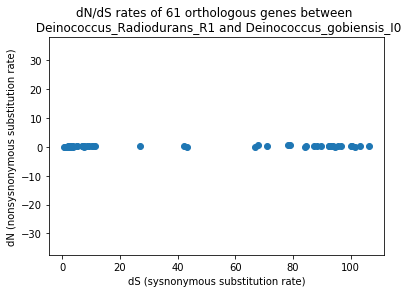

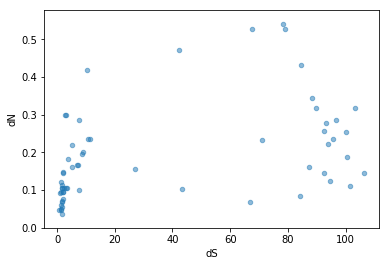

In [47]:
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(ds_dn_df.dS, ds_dn_df.dN)
plt.title("dN/dS rates of 61 orthologous genes between \n {} and {}".format(species1, species2))
plt.xlabel('dS (sysnonymous substitution rate)')
plt.ylabel('dN (nonsysnonymous substitution rate)')
ds_dn_df.plot.scatter(x='dS', y='dN', alpha=0.5)
#df.plot.scatter(x='sepal_length', y='petal_length', alpha=0.5)

In [37]:
for feature in records1[list(records1.keys())[0]].features:
    if feature.type == "CDS":
        if feature.qualifies.
    print(feature)

type: source
location: [0:2648638](+)
qualifiers:
    Key: chromosome, Value: ['1']
    Key: db_xref, Value: ['taxon:243230']
    Key: mol_type, Value: ['genomic DNA']
    Key: organism, Value: ['Deinococcus radiodurans R1']
    Key: strain, Value: ['R1']

type: gene
location: [0:1182](-)
qualifiers:
    Key: db_xref, Value: ['GeneID:1799546']
    Key: locus_tag, Value: ['DR_0001']

type: CDS
location: [0:1182](-)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GeneID:1799546']
    Key: locus_tag, Value: ['DR_0001']
    Key: note, Value: ['similar to SP:P52851 PID:1321894 percent identity: 54.97; identified by sequence similarity; putative']
    Key: product, Value: ['DNA polymerase III subunit beta']
    Key: protein_id, Value: ['NP_293727.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MMKANVTKKTLNEGLGLLERVIPSRSSNPLLTALKVETSEGGLTLSGTNLEIDLSCFVPAEVQQPENFVVPAHLFAQIVRNLGGELVELELSGQELSVRSGGSDFKLQTGDIEAYPPLSFPAQADVSLDGGELSRAFSSVRYAASNEAFQA


type: gene
location: [1008231:1009407](-)
qualifiers:
    Key: db_xref, Value: ['GeneID:1799350']
    Key: locus_tag, Value: ['DR_0991']

type: CDS
location: [1008231:1009407](-)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GeneID:1799350']
    Key: locus_tag, Value: ['DR_0991']
    Key: note, Value: ['similar to GB:AE000782 percent identity: 53.17; identified by sequence similarity; putative']
    Key: product, Value: ['class V aminotransferase']
    Key: protein_id, Value: ['NP_294715.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MTGTVGVMSDPLPAHLPLNRERLIAPGPVEVAPDVLLALAQPQMHHRAPQGVAKLMEAREKLTRLLGDPYDAVITTSSGTGAFEGALVSTTPTGAKVVNAQAGKFSERWGDMAKRFSYDTQIVAKPWGEMLDPDEVADACRGAHTLTITHSETSTGALHDLEAIAGAAKAQNPDLIIIADCITSYGNAELRPAAWGVDVVVSGSQKGTATPPGLGFVLFSPEVQGRMIKNTPHGFYLDMTRELAGQKAGSTPQTPAINLIYALSVALDHLLRVPLEVLWAEQRRKTDALIAAGTALGAPAWAARPSAAVAVLRPPEGIGGKQVAARLAEMGQRALPGQAPHEDTVFRVSTMGYADRYDTLGIAGMLEDCFASLGVQFERGAGVQAAWEVLR']

type: gene



type: CDS
location: [1967439:1968465](-)
qualifiers:
    Key: EC_number, Value: ['2.3.1.41']
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GeneID:1798455']
    Key: locus_tag, Value: ['DR_1946']
    Key: note, Value: ['FabH; beta-ketoacyl-acyl carrier protein synthase III; catalyzes the condensation of acetyl-CoA with malonyl-ACP to initiate cycles of fatty acid elongation; differs from 3-oxoacyl-(acyl carrier protein) synthase I and II in that it utilizes CoA thioesters as primers rather than acyl-ACPs; in Pseudomonas this protein is involved in quinolone signal biosynthesis']
    Key: product, Value: ['3-oxoacyl-ACP synthase III']
    Key: protein_id, Value: ['NP_295669.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MKSIGITAIGMYVPERVVHNHEFESRMGIEDGWIESRSGIRERRFSAPGEFASHIGAKAVQDMLARDPDALKDVDLVIYATCTPDAMFPSTAALVAGQVGLTGVGAYDLSTACSGFVYALSMARGMILGGSAKNVLVLGGEVLSKALDQDDRDTAILFGDGCGCAVVGEVPAGYGFQDFVLGADSAGGPALYISNLADQFPDGQIMRGVPTMNGREVFKFAVRVLGDSGT

In [39]:
for entry in dic:
    print(entry['entry_1']['canonicalid'])
    if entry['entry_1']['canonicalid'] == "PPRA_DEIRA":
        print(entry)

DNAA_DEIRA
Q9RYE8
ENO_DEIRA
Q9RR62
Q9RRM5
Q9RR99
Q9RR73
LDH_DEIRA
Q9RRW9
Q9RZ85
Q9RRX1
Q9RRX0
Q9RY26
Q9RYD3
Q9RYD2
Q9RYD1
Q9RYD0
Q9RYC9
Q9RT46
Q9RRX2
Q9RRX3
Q9RRZ5
Q9RRZ4
Q9RYY4
Q9RYY5
Q9RYF8
Q9RRF7
Q9RY30
Q9RY29
TRPF_DEIRA
Q9RY27
Q9RRF3
Q9RRQ0
Q9RRQ2
FMT_DEIRA
DEF_DEIRA
Q9RRQ5
Q9RRQ6
Q9RYH6
Q9RY08
Q9RS09
Q9RS08
Q9RS07
MENG_DEIRA
Q9RRY6
Q9RRY1
ACKA_DEIRA
NP_293799
Q9RSX1
Q9RRZ8
Q9RRZ7
Q9RRQ7
Q9RRQ8
FUMC_DEIRA
Q9RRE7
Q9RR74
Q9RYE0
PARB1_DEIRA
Q9RYD7
RSMG_DEIRA
Q9RYD5
MNMG_DEIRA
Q9RYC1
Q9RYC0
Q9RYB9
Q9RYB8
Q9RRT6
CRCB_DEIRA
EX7L_DEIRA
Q9RRG1
Q9RRG4
Q9RR93
Q9RZ24
Q9RRR6
Q9RXR7
ACPS_DEIRA
Q9RXQ9
Q9RXQ8
Q9RXQ7
Q9RXQ6
TGT_DEIRA
Q9RSV4
Q9RXB8
Q9RXM5
Q9RXM3
Q9RY67
RS6_DEIRA
SSB_DEIRA
RS18_DEIRA
RL9_DEIRA
Q9RY45
Y2321_DEIRA
Q9RRU1
Q9RRR0
Q9RRH8
Q9RRH9
Q9RRI0
PNP_DEIRA
Q9RRP9
Q9RRP8


In [53]:
seq = Seq("ATGCTCAAGATCCGTTCTCTCGGCCACAGCACTTTCTTTCTCGATGACGGGACGCACCGT\
CTGCTCATCGAACCCTTTCTCGAAGGCAACCCGCGCTGCCCGGTGACCCTCGGCGAAGTG\
CAGTCGTGGCAGCCGAGCGCCGTGCTCATCAGCCACGCCCACGGCGACCACTGGGGCAAC\
GCCCTGGATTTCGGACGGGCGGGCGTGCCGATCATCGCCACCGCCGAGATCGCCGGGTAC\
GCCGGAGCGCACGGCGCCAACAACGCCGTCGGCATGAACATCGGCGGCACCTACCGCGCC\
GAGTGGGGCAGCGTTTCCCTGACCCCCGCGTGGCACTCGAGCTCCTTTCCCGACGGCACC\
TACGGCGGAATGCCCACGGGTCTGGTCATCGAGTTCGGCGGCCAGCGCCTGTATTTCGCG\
GGCGACACCGCGCTGTTTTCCGACATGCGCCTGATCGGGGACCGCGAACTCGACCTCGCG\
TTCCTGCCCATCGGCGACCACTACACCATGGGGCCGGAAGAGGCCGGGCGCACGCTGGAC\
TTGCTGCGTCCGCGCGTTGCCATTCCCATGCACTACGCGACTTTCCCGGCCCTGACCGGC\
GACCCCGCCGTCTTCCGCACCGAGGGCGAACGGCGCGGCGTGGAGGTCCGGGTCCTTGAC\
CCCGGCGAGACGACCGAGCTGTAA")

In [55]:
seq.translate(table=11)

Seq('MLKIRSLGHSTFFLDDGTHRLLIEPFLEGNPRCPVTLGEVQSWQPSAVLISHAH...EL*', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [171]:
with open(in_file_nuc) as f:
    l = f.readlines()
    print(l)
    ls=[]
    ls.append(l[0])

    s = ""
    for i in range(len(l[1])):
        s += l[1][i]
        if i % 60 == 59:
            s += "\n"
        elif i % 10 == 9:
            s += " "
    ls.append(s)
    
    ls.append(l[2])
    s = ""
    for i in range(len(l[3])):
        s += l[3][i]
        if i % 60 == 59:
            s += "\n"
        elif i % 10 == 9:
            s += " "
    ls.append(s)
    with open(out_file_for_codeml, mode='w') as fw:
        fw.writelines(ls)
    

['>Deinococcus gene1\n', 'TCACGCGAACTCTGGCCTCGGTTCAAGCGGCGGTGAACTTTCCGGGTGATGGGCCAGGGCAGACATGCCCCGTAACGGCCTCAGAAGGCCCCTTAAACGCGCAGCGTGACCATGACCGCCATATACCCGCCTCCCCCACCTACGGGCGCGGAAAATGGCGGGGCTGGTGGACCCGGAGAACAGCAGCTCGGCGTCTCCGTCAATCGGGCCCAGCGCATCGAGCACATGGCGAGCGTTGAAGGCGAGGCTCATCGCCTGCTCGGTGCCGCCCTGGGTGACGCTGAGCGTGTCCTGAGCGCGGCCATAGTCGCCCTCCGCAGCGAGGCGCAGAGTGCCTTCGGACACCAGAAACTCGACGCGGTTGTTGGCGTTTTTGTCGGCCAGCACGGCCACACGGTTGACCGCTTCCTTGAGGGCGGTGGCGGGCAGTGTCACCTGAAGTTTGATGTCCTTGGGAATGACCCGCTCGTAGTCGGGAAAATCACCGTCGAGCAGCTTGAGGTTCATCTTCACGCGGTCGGTGGTCACGGTGAGCATGCCGTCGCCGTAGGTGAACCGCGCCTCGCCGTCCTTGAGCACGCGAATCAGTTCGTCCACGCTGCGGGCGGGAATAATCAGGTTTTTGCCGTCGCCGCTCGCCGGAAAGTCGCGGATAGCCACCCGGTAACCGTCGGACGCCACCACGCGGGCGCTCTCGCCGTGGTGCTCAAGCTTAATGCCGCGAAACACCGCCTGAAACGCCTCGTTGCTTGCCGCGTAGCGCACGCTGGAAAAGGCGCGGGACAGTTCGCCGCCGTCCAGGCTCACATCGGCCTGTGCGGGGAAAGAGAGTGGCGGGTACGCTTCGATGTCACCGGTCTGGAGCTTGAAATCTGAGCCGCCCGAGCGCACCGAGAGTTCCTGGCCGCTCAGTTCGAGTTCGACGAGCTCACCGCCGAGGTTGCGAACGATTTGCGCGAACAGGTGCGCCGGCA

In [182]:
from skbio import Alignment, DNA

ImportError: cannot import name 'Alignment'

In [75]:
with open(out_file) as f:
    l = f.readlines()
    print(len(l))
        
    #並べる用のindex
    idx1 = 0
    idx2 = int(len(l) / 2)
    
    #新しく書き込む用の配列
    ls = []
   
    #ギャップの記号を-から.に書き換える
    for i in range(len(l)):
        l[i] = l[i].replace('-', '.')

    
    for i in range(int(len(l)/2)):
        if i == 0:
            ls.append(l[idx2 + i][1:])
            ls.append(l[idx1 + i][1:])
            continue
        else:
            ls.append( "{}\n".format(60*(i-1)+1))
            aligned_seq1_with_space1 = ""
            aligned_seq1_with_space2 = ""
            for j in range(len(l[i])):
                aligned_seq1_with_space1 += l[idx1 + i][j]
                aligned_seq1_with_space2 += l[idx2 + i][j]
                if j % 3 == 2:
                    aligned_seq1_with_space1 += " "
                    aligned_seq1_with_space2 += " "
#                 print(aligned_seq1_with_space)
            ls.append(aligned_seq1_with_space2)
            ls.append(aligned_seq1_with_space1)
    print(ls)
    
    #1行目の追加
    idx = int(len(l)/2)-1
    ortho_len = 60 * (idx-1) + len(l[idx]) - 1 #-1は\nの分
    ls.insert(0, "\t2\t{}\tI\n\n".format(ortho_len))
    
    with open(out_file_for_codeml, mode='w') as fw:
        fw.writelines(ls)
            
    #print(f.read())
    
    
# リファレンスには.があってはいけないみたい
# じゃあどうするねん

44
['Thermus thermophilus gene1\n', 'Deinococcus gene1\n', '1\n', 'TGA ACA TAA CGG TTC CCA AAA AAC TCC TCT CGG ACC AGC TTT C.. ... ... CCT CCT GGA \n', '.CA CGC GAA CTC TGG CCT CGG TTC AAG CGG CGG T.G AAC TTT CCG GGT GAT GGG CCA GGG \n', '61\n', 'GCG CAT CGT CCC CTC TAG AAG CGC ..C AAC CCC CTC TAC ACC TAC CTG GGG CTT TAC GCC \n', 'CAG ACA TGC CCC GTA ACG GCC TCA GAA GGC CCC TTA AAC GCG CAG CGT GAC CAT GAC CGC \n', '121\n', 'GAG GAA GGG GCC TTG ATC CTC TTC GGG ACC AAC G.. ... ... GGG AGG TGG ACC TCG AGG \n', 'CAT ATA CCC GCC TCC CCC ACC TAC GGG CGC GGA AAA TGG CGG GGC TGG TGG ACC CGG AGA \n', '181\n', 'TCC GCC TCC CCG CCG AGG CCC AAA GCC TTC CCC GGG TGC TCG TCC CCG CCC AGC CCT TCT \n', 'ACA GCA GCT CGG CGT CTC CGT CAA ... ... ... ... ... ... .TC GGG CCC AG. ..C GCA \n', '241\n', 'TCC AGC TGG TGC GGA GCC TTC CTG GGG ACC TCG TGG CCC TCG GCC TCG CCT CGG AGC CGG \n', 'TCG AGC ACA TGG CGA GCG TTG AAG GCG AGG CTC ATC GCC TGC ... ... ..T CGG TGC CGC \n', '301\n', 'GCC AGG GGG GGC AGC TGG AGC T

In [140]:
for record_id, record in records1.items():
    print(record_id)
    for feature in record.features:
        if(feature.type == "CDS"):
            print(feature.qualifiers['translation'])
    break

NC_001263.1
['MMKANVTKKTLNEGLGLLERVIPSRSSNPLLTALKVETSEGGLTLSGTNLEIDLSCFVPAEVQQPENFVVPAHLFAQIVRNLGGELVELELSGQELSVRSGGSDFKLQTGDIEAYPPLSFPAQADVSLDGGELSRAFSSVRYAASNEAFQAVFRGIKLEHHGESARVVASDGYRVAIRDFPASGDGKNLIIPARSVDELIRVLKDGEARFTYGDGMLTVTTDRVKMNLKLLDGDFPDYERVIPKDIKLQVTLPATALKEAVNRVAVLADKNANNRVEFLVSEGTLRLAAEGDYGRAQDTLSVTQGGTEQAMSLAFNARHVLDALGPIDGDAELLFSGSTSPAIFRARRWGRRVYGGHGHAARLRGLLRPLRGMSALAHHPESSPPLEPRPEFA']
['MRKNVSDLEYTTWFAPVKPLGVQEGSLLLGVRNSFTKDWFRDHYLELLLAALRSLGAEHPQVEFQVLPAAQDALLLPNDPPPAPEAAAPTPKTKAAPTPPPSTPGDNRKTLNPKYTFENFVVGPNNNLAHAAALAVAESPGKAYNPLFIYGDVGLGKTHLMHAVGHYLAERFPEKRIEYVSTETFTNELINAIRDDKTTQFRNRYRSVDLLLVDDIQFLAGKERTQEEFFHTFNALYESNKQIILSSDRPPKDIQTLEGRLRSRFEWGLITDIQSPEYETRVAILKMNAEQGHITIPQEVLELIARQVTSNIRELEGALMRVVAFASLNNVPFSRAAAAKALSNVFAPQEAKVEMTDVLRQVAAHYGTTPDLIRGSGRARDIVVPRQVAQYLIRALTDHSLPEIGQFFGRDHSTVMHAVSKITEQMGKDPELAATVNTLRNRIQGKEEEEEVGA']
['MGTGDPSPLASQGPLPLVEGQKMKKPPPVRRGMNEAMEDRGSFFMALVSAYALHLARPFPALALAAGYLFVEGEDGCVAPRFAFLNGAGGHGVDVGQPQQFGARQAVAGGLDAAFLTYRRAVLAKDGAV

In [284]:
for feature in ch1.features:
    #print(records[key])
    if(feature.type == 'CDS'):
        url_with_q = url + "/sequence/?query=" + "{}".format(feature.qualifiers['translation'])
        print(url_with_q)
        response = requests.get(url_with_q)
        print(response.status_code)
        #print(type(response))
        #print(dir(response))
        if response.status_code != 200:
            continue
        print(response)
        dic = json.loads(response.content.decode())
        #print(dic)
        omaid = dic['targets'][0]['omaid']
        url_for_orthology = url + "/protein/" + "{}".format(omaid) + "/orthologs/?rel_type=1%3A1";
        res_orthologs = requests.get(url_for_orthology)
        json_ortho_list = json.loads(res_orthologs.content.decode())
        set_ortho_list = set()
        for ortho in ortho_list:
            set_ortho_list.add(ortho['entry_nr'])
    break

In [286]:
ortho_list = json.loads(res_orthologs.content.decode())
ortho_list

[{'entry_nr': 115488,
  'entry_url': 'https://omabrowser.org/api/protein/115488/',
  'omaid': 'FERPA00703',
  'canonicalid': 'D3RWP1',
  'sequence_md5': '014f10a7db88eb0921cf9df3f1786732',
  'oma_group': 813003,
  'oma_hog_id': 'HOG:0018779',
  'chromosome': 'Chromosome',
  'locus': {'start': 638640, 'end': 639413, 'strand': 1},
  'is_main_isoform': True,
  'rel_type': '1:1',
  'distance': 193.0,
  'score': 181.88999938964844},
 {'entry_nr': 138251,
  'entry_url': 'https://omabrowser.org/api/protein/138251/',
  'omaid': 'NATM801448',
  'canonicalid': 'M1XR41',
  'sequence_md5': '629690ddb2cd951a3ccbd6dd804733eb',
  'oma_group': 627788,
  'oma_hog_id': 'HOG:0016462.1a',
  'chromosome': 'A',
  'locus': {'start': 1439312, 'end': 1440145, 'strand': -1},
  'is_main_isoform': True,
  'rel_type': '1:1',
  'distance': 155.0,
  'score': 193.5500030517578},
 {'entry_nr': 148897,
  'entry_url': 'https://omabrowser.org/api/protein/148897/',
  'omaid': 'HALS302639',
  'canonicalid': 'OE6220R',
  's

In [129]:
seq1 = records1[list(records1.keys())[0]]
j=0
global seq
for i in seq1.features:
    if(i.type == 'CDS'):
        print(i.qualifiers['translation'])
        print(i)
        seq = records1[list(records1.keys())[0]].seq[0:1182]
        j+=1
        if j>2:
            break

['MMKANVTKKTLNEGLGLLERVIPSRSSNPLLTALKVETSEGGLTLSGTNLEIDLSCFVPAEVQQPENFVVPAHLFAQIVRNLGGELVELELSGQELSVRSGGSDFKLQTGDIEAYPPLSFPAQADVSLDGGELSRAFSSVRYAASNEAFQAVFRGIKLEHHGESARVVASDGYRVAIRDFPASGDGKNLIIPARSVDELIRVLKDGEARFTYGDGMLTVTTDRVKMNLKLLDGDFPDYERVIPKDIKLQVTLPATALKEAVNRVAVLADKNANNRVEFLVSEGTLRLAAEGDYGRAQDTLSVTQGGTEQAMSLAFNARHVLDALGPIDGDAELLFSGSTSPAIFRARRWGRRVYGGHGHAARLRGLLRPLRGMSALAHHPESSPPLEPRPEFA']
type: CDS
location: [0:1182](-)
qualifiers:
    Key: codon_start, Value: ['1']
    Key: db_xref, Value: ['GeneID:1799546']
    Key: locus_tag, Value: ['DR_0001']
    Key: note, Value: ['similar to SP:P52851 PID:1321894 percent identity: 54.97; identified by sequence similarity; putative']
    Key: product, Value: ['DNA polymerase III subunit beta']
    Key: protein_id, Value: ['NP_293727.1']
    Key: transl_table, Value: ['11']
    Key: translation, Value: ['MMKANVTKKTLNEGLGLLERVIPSRSSNPLLTALKVETSEGGLTLSGTNLEIDLSCFVPAEVQQPENFVVPAHLFAQIVRNLGGELVELELSGQELSVRSGGSDFKLQTGDIEAYPPLSFPAQADVSLDGGELSRAFSS

In [130]:
seq = records1[list(records1.keys())[0]].seq[1903:3268]
seq.reverse_complement().translate(table=11)

Seq('VRKNVSDLEYTTWFAPVKPLGVQEGSLLLGVRNSFTKDWFRDHYLELLLAALRS...GA*', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [131]:
seq.reverse_complement()

Seq('GTGCGCAAAAACGTCTCCGACTTGGAGTACACGACCTGGTTCGCGCCGGTCAAA...TAA', IUPACAmbiguousDNA())